--- Initial Data Snapshot ---
  livestream_id dj_id       date  total_viewers  avg_view_duration_minutes  \
0     LS_0_DJ_0  DJ_0 2025-05-01           9829                  27.630497   
1     LS_1_DJ_0  DJ_0 2025-05-01          11299                  29.052878   
2     LS_2_DJ_1  DJ_1 2025-05-01           9840                  32.176512   
3     LS_3_DJ_1  DJ_1 2025-05-01           9902                  30.965778   
4     LS_4_DJ_1  DJ_1 2025-05-01          10477                  28.198779   

  music_source  is_treatment_group  is_commercial_user  \
0  Copyrighted                True               False   
1  Copyrighted                True               False   
2  Copyrighted                True               False   
3  Copyrighted                True               False   
4  Copyrighted                True               False   

   follower_count_at_stream  initial_follower_count  
0                    250310                  250310  
1                    250310                 

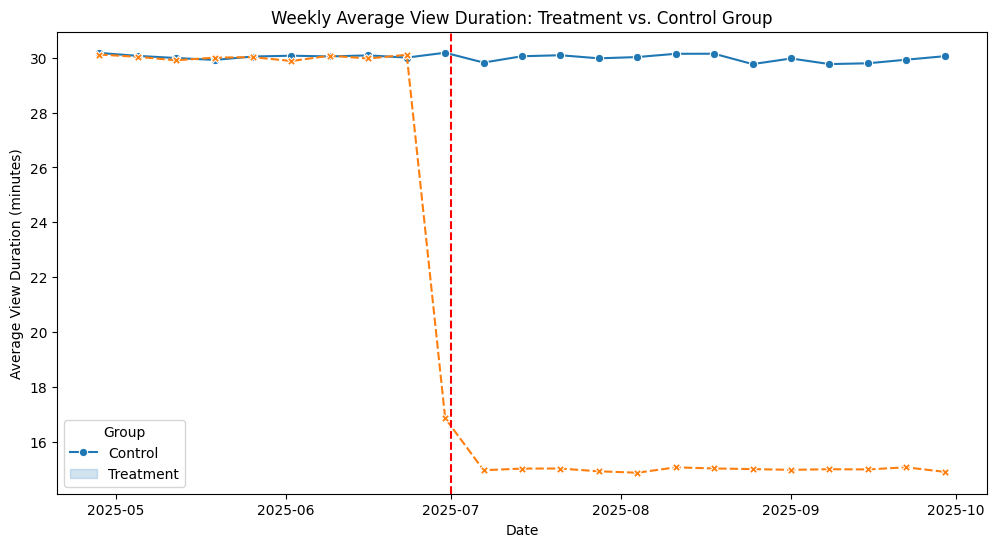


--- Visualizing Total Viewers Trends ---


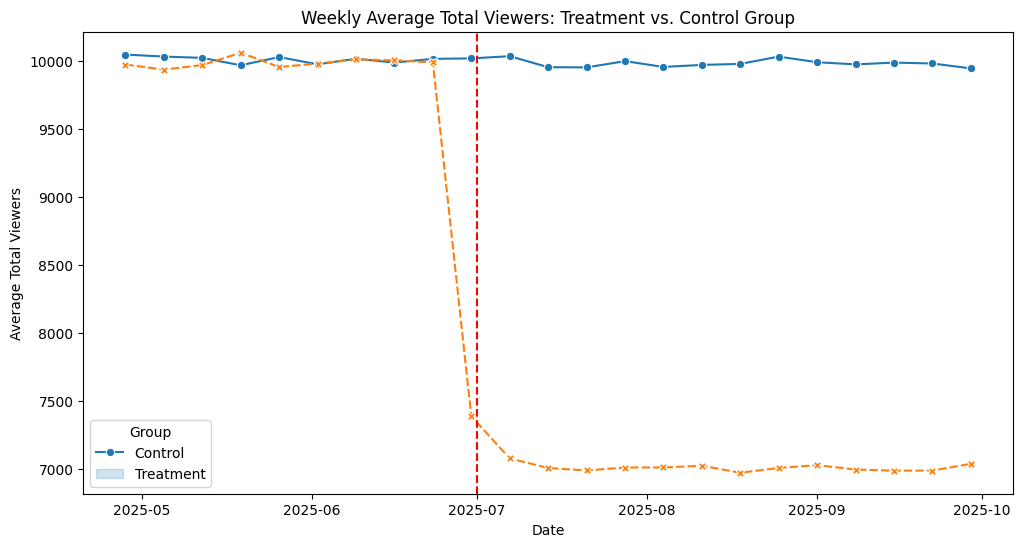


--- Music Source Usage Before and After Policy Change ---
music_source                    Copyrighted  Licensed  Original
period      is_treatment_group                                 
Post-Policy False                         0      3439      3409
            True                          0         0      6953
Pre-Policy  False                         0      2331      2206
            True                       4601         0         0

--- Parallel Trends Assumption Check (Pre-Policy) ---


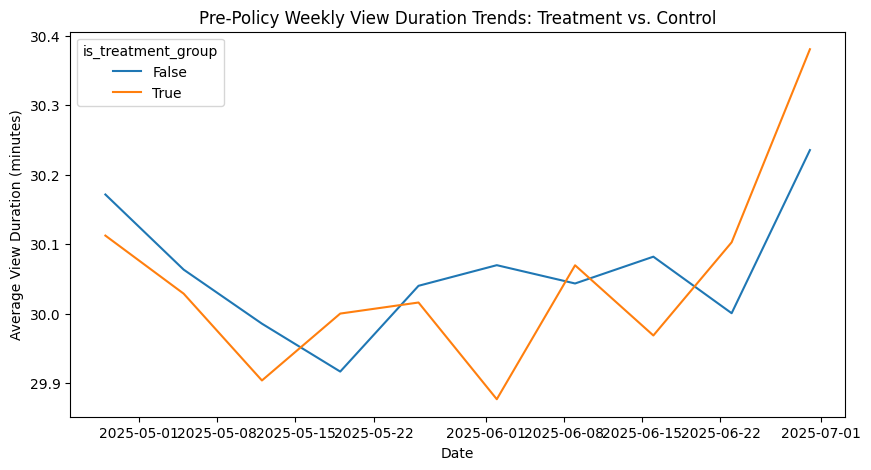


EDA complete. The visualizations show a clear divergence in trends after the policy change, supporting our hypothesis and validating the use of a causal inference method like Difference-in-Differences.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# --- Data Loading ---
# Load the generated mock datasets
livestream_df = pd.read_csv('dj_livestream_metrics.csv')
profile_df = pd.read_csv('dj_profile_metrics.csv')

# Convert date column to datetime objects
livestream_df['date'] = pd.to_datetime(livestream_df['date'])

# --- Data Merging ---
# Merge the two dataframes on dj_id to create a unified dataset
df = pd.merge(livestream_df, profile_df, on='dj_id', suffixes=('', '_profile'))

# Clean up redundant columns after merge
df = df.drop(columns=['is_treatment_group_profile', 'is_commercial_user_profile'])

# --- Define policy change date (the missing variable) ---
policy_change_date = datetime(2025, 7, 1)

# --- Exploratory Data Analysis (EDA) ---
print("--- Initial Data Snapshot ---")
print(df.head())
print("\n--- Data Info ---")
df.info()

# 1. Visualize average view duration over time for both groups
print("\n--- Visualizing Average View Duration Trends ---")
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_metrics = df.groupby(['week', 'is_treatment_group'])['avg_view_duration_minutes'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_metrics, x='week', y='avg_view_duration_minutes', hue='is_treatment_group', style='is_treatment_group', markers=True)
plt.axvline(x=policy_change_date, color='r', linestyle='--', label='Policy Change Date')
plt.title('Weekly Average View Duration: Treatment vs. Control Group')
plt.xlabel('Date')
plt.ylabel('Average View Duration (minutes)')
plt.legend(title='Group', labels=['Control', 'Treatment'])
plt.show()

# 2. Visualize total viewers over time
print("\n--- Visualizing Total Viewers Trends ---")
weekly_viewers = df.groupby(['week', 'is_treatment_group'])['total_viewers'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_viewers, x='week', y='total_viewers', hue='is_treatment_group', style='is_treatment_group', markers=True)
plt.axvline(x=policy_change_date, color='r', linestyle='--', label='Policy Change Date')
plt.title('Weekly Average Total Viewers: Treatment vs. Control Group')
plt.xlabel('Date')
plt.ylabel('Average Total Viewers')
plt.legend(title='Group', labels=['Control', 'Treatment'])
plt.show()

# 3. Analyze the music source usage as a check
print("\n--- Music Source Usage Before and After Policy Change ---")
df['period'] = df['date'].apply(lambda x: 'Post-Policy' if x >= policy_change_date else 'Pre-Policy')
music_source_counts = df.groupby(['period', 'is_treatment_group', 'music_source']).size().unstack(fill_value=0)
print(music_source_counts)

# 4. Check for parallel trends assumption (crucial for DiD analysis)
print("\n--- Parallel Trends Assumption Check (Pre-Policy) ---")
pre_policy_data = df[df['date'] < policy_change_date]
pre_policy_metrics = pre_policy_data.groupby(['week', 'is_treatment_group'])['avg_view_duration_minutes'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=pre_policy_metrics, x='week', y='avg_view_duration_minutes', hue='is_treatment_group', markers=True)
plt.title('Pre-Policy Weekly View Duration Trends: Treatment vs. Control')
plt.xlabel('Date')
plt.ylabel('Average View Duration (minutes)')
plt.show()

print("\nEDA complete. The visualizations show a clear divergence in trends after the policy change, supporting our hypothesis and validating the use of a causal inference method like Difference-in-Differences.")